In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ship=pd.read_csv("ship.csv")

In [3]:
ship.head()
ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Gender', ylabel='Survived'>

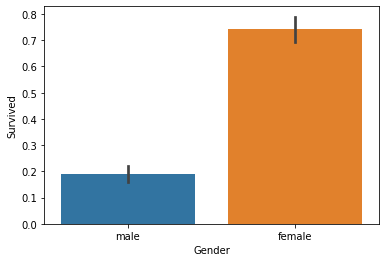

In [4]:
sns.barplot(data=ship,x='Gender',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

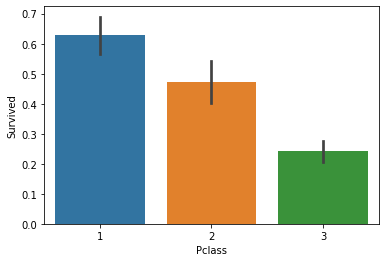

In [5]:
sns.barplot(data=ship,x='Pclass',y='Survived')

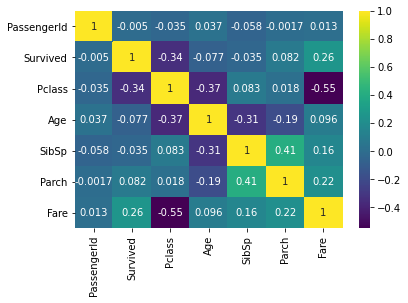

In [6]:
sns.heatmap(ship.corr(),annot=True,cmap="viridis")
plt.savefig("Data.jpeg")

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

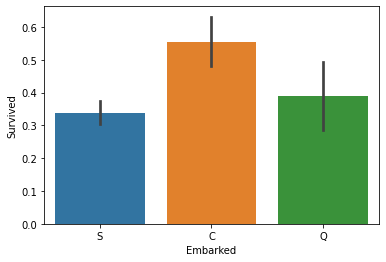

In [7]:
sns.barplot(data=ship,x='Embarked',y='Survived')

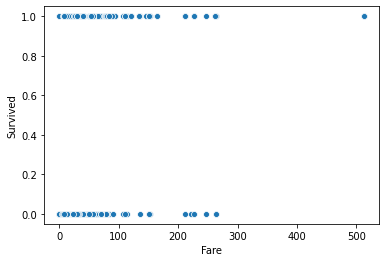

In [8]:
sns.scatterplot(data=ship,x='Fare',y='Survived')
plt.show()

In [9]:
ship.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# First Step is Wrangle Data in Age column based on Age groups
# On a high level-- All Masters will be boys and not men, therefore their mean age should be calculated differently
# For rest of dataset wherever Age is not available calculate Mean with remaining Data Set

In [11]:
mean_Master_Age=ship[ship['Name'].str.contains("Master")]['Age'].mean()


In [12]:
mean_Master_Age


4.574166666666667

In [13]:
ship["Age"] = np.where((ship['Name'].str.contains("Master")) & (ship['Age'].isna()), mean_Master_Age, ship.Age)

In [14]:
# Replace Gender for all Masters
ship["Gender"] = np.where((ship['Name'].str.contains("Master")), "Child (Boy)", ship.Gender)

In [15]:
ship.Gender.value_counts()

male           537
female         314
Child (Boy)     40
Name: Gender, dtype: int64

In [16]:
mean_General_Age=ship[ship['Gender'].str.contains("male")| ship['Gender'].str.contains("female")]['Age'].mean()

In [17]:
mean_General_Age

31.033185840707965

In [18]:
ship["Age"] = np.where((ship['Gender'].str.contains("male"))| (ship['Gender'].str.contains("female")) & (ship['Age'].isna()), mean_General_Age, ship.Age)

In [19]:
# Validate all Age data is now in place
ship.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# make a new df with categorical as numerical columns(code from KJo)
ship1 = pd.get_dummies(data = ship, columns= ['Gender', 'Embarked'], drop_first=True)

In [21]:
from sklearn.linear_model import LogisticRegression

In [23]:
# Build a Model for Survival Prediction


x=ship1[['Pclass','Gender_male','Age','Embarked_Q',"SibSp"]]
y=ship1['Survived']

In [24]:
ship1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Gender_female,Gender_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",31.033186,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",31.033186,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",31.033186,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",31.033186,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",31.033186,0,0,373450,8.0500,NaN,0,1,0,1


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [26]:
#creating estimator object for standardization
from sklearn.preprocessing import StandardScaler
stdSC=StandardScaler()
stdSC.fit(x_train)
x_train_std=stdSC.transform(x_train)
x_test_std=stdSC.transform(x_test)


In [27]:
x_train_std

array([[ 0.83012938,  0.80837203,  0.2261204 , -0.31414043, -0.46037161],
       [ 0.83012938, -1.23705417,  0.2261204 , -0.31414043,  2.98532288],
       [ 0.83012938,  0.80837203,  0.2261204 , -0.31414043,  0.40105202],
       ...,
       [ 0.83012938,  0.80837203,  0.2261204 ,  3.1832897 , -0.46037161],
       [ 0.83012938, -1.23705417,  0.2261204 , -0.31414043,  0.40105202],
       [-0.36497068,  0.80837203,  0.2261204 , -0.31414043,  0.40105202]])

In [28]:
shipModel=LogisticRegression(max_iter=1000)

In [29]:
shipModel.fit(x_train_std,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
shipModel.coef_

array([[-0.78290471, -1.56192063, -0.11713883,  0.03476136, -0.68729812]])

In [31]:
shipModel.intercept_

array([-0.66643037])

In [32]:
shipModel.predict(x_train_std)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [33]:
shipModel.score(x_train_std,y_train)

0.8308383233532934

In [34]:
print("Train Score: ", shipModel.score(x_train_std,y_train))
print("Test Score: ", shipModel.score(x_test_std,y_test))

Train Score:  0.8308383233532934
Test Score:  0.8026905829596412


In [35]:
predicted_train=shipModel.predict(x_train_std)

In [36]:
predicted_train

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [37]:
# generate Confusion Matrix
pd.crosstab(y_train,predicted_train)

col_0,0,1
Survived,,
0,368,42
1,71,187
